In [249]:
import pickle
out_fp = "../../data/grmesa_confidence.pkl"
grmesa_confidence = pickle.load(open(out_fp, 'rb'))

<AxesSubplot:>

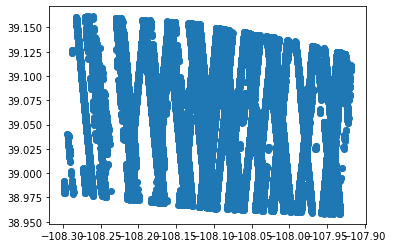

In [250]:
grmesa_confidence.plot()

In [9]:
pwd

'/home/jovyan/isce_sat2/contributors/sam'

In [48]:
import rasterio as rio
from rasterio.plot import show
fn = '/home/jovyan/isce_sat2/contributors/sam/download/grmesa_27416_20003-028_20005-007_0011d_s01_L090_01_int_grd/grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd.tiff'

src = rio.open(fn)

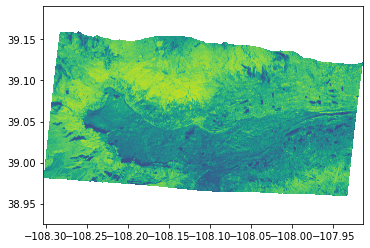

<AxesSubplot:>

In [49]:
show(src)

In [55]:
import geopandas as gpd
import pandas as pd

df = pd.DataFrame(
    {'Point Number': [1, 2, 3, 4],
     'Latitude': [39.1, 39.1, 39.1, 39.1],
     'Longitude': [-108.25, -108.2, -108.1, -108]})

test_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))



<AxesSubplot:>

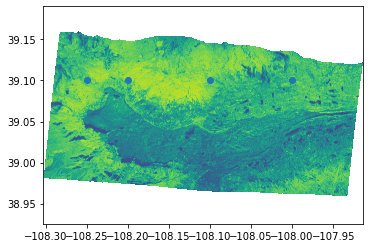

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 4))

# Plot Near IR, Red, Green and Blue (rgb)
show((src), ax=ax)
test_gdf.plot(ax=ax)

In [16]:
import numpy as np
import os
import rasterio as rio

# This function written by David Shean, UW
#src = rio.open(fn)
def sample_raster(df, src, diff_col=None):
    #df_proj = df.to_crs(src.crs)
    coord = [(pt.x, pt.y) for pt in df.to_crs(src.crs).geometry]
    s = np.fromiter(src.sample(coord), dtype=src.dtypes[0])
    #s[s == src.nodata] = np.nan
    sm = np.ma.masked_equal(s, src.nodata)
    sample_colname = os.path.splitext(os.path.split(src.name)[-1])[0]
    df[sample_colname] = sm
    if diff_col is not None:
        out_colname = '{} {} diff'.format(diff_col, sample_colname)
        df[out_colname] = df[diff_col] - df[sample_colname]
    else:
        out_colname = sample_colname
    return out_colname


In [59]:
test_gdf = test_gdf.set_crs('epsg:4326')

In [60]:
print(test_gdf.crs)

epsg:4326


In [61]:
sample_raster(test_gdf, src)

'grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd'

In [62]:
test_gdf.head()

,Point Number,Latitude,Longitude,geometry,grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd
0,1,39.1,-108.25,POINT (-108.25000 39.10000),0.793175
1,2,39.1,-108.20,POINT (-108.20000 39.10000),0.881858
2,3,39.1,-108.10,POINT (-108.10000 39.10000),0.710891
3,4,39.1,-108.00,POINT (-108.00000 39.10000),0.410808


<AxesSubplot:>

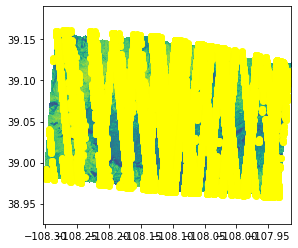

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 4))

# Plot Near IR, Red, Green and Blue (rgb)
show((src), ax=ax)
grmesa_confidence.plot(ax=ax, color='yellow')

In [54]:
grmesa_confidence.head()


,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence
time,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2


In [63]:
sample_raster(grmesa_confidence, src)

'grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd'

In [64]:
grmesa_confidence.head()

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence,grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd
time,,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2,0.515718
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2,0.451075
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2,0.649767
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2,0.855333
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2,0.747337


In [66]:
directory = '/home/jovyan/isce_sat2/contributors/sam/download/'

dirs = [x[0] for x in os.walk(directory)]

In [87]:
csv_path = dirs[1] + '/' + dirs[1].split('/')[-1] + '.csv'
#csv_path
cor_df = pd.read_csv(csv_path)
cor_df


,Unnamed: 0,uavsar rpi annotation file version number,site description,flight plan comments of pass 1,flight plan comments of pass 2,processing comments,url,slant range interferogram,slant range unwrapped phase,slant range correlation,...,grd_phs.val_maxv,slc_phs.val_mult,slc_phs.val_minv,slc_phs.val_maxv,dsp_cmap,slt_phs.dsp_cmap,grd_phs.dsp_cmap,slc_phs.dsp_cmap,set_hddr,set_tail
0,value,2.3,"Grand Mesa, CO",NaN,NaN,NaN,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,grmesa_27416_21019-017_21021-005_0006d_s01_L09...,grmesa_27416_21019-017_21021-005_0006d_s01_L09...,grmesa_27416_21019-017_21021-005_0006d_s01_L09...,...,3.14,1.0,-3.14,3.14,grey,cmy,cmy,cmy,0,0
1,units,-,&,&,&,&,&,&,&,&,...,rad,-,rad,rad,&,&,&,&,bytes,bytes
2,comment,uavsar rpi annotation file version number ...,site description ...,flight plan comments of pass 1 ...,flight plan comments of pass 2 ...,processing comments ...,url ...,file size 108953600 bytes,file size 54476800 bytes,file size 54476800 bytes,...,maximum value default for display,maximum value default for display,maximum value default for display,maximum value default for display,default grey color table,color table for interferogram phase,color table for interferogram phase,color table for interferogram phase,header bytes in raw data,tail bytes in raw data


In [98]:
start = cor_df['start time of acquisition for pass 1'][0]
start

'16-Mar-2021 16:39:43 UTC'

In [99]:
end = cor_df['stop time of acquisition for pass 2'][0]
end

'22-Mar-2021 15:33:21 UTC'

In [96]:
grmesa_confidence.index[0]

Timestamp('2018-10-17 22:31:18.451049752')

In [ ]:
from datetime import datetime

datetime_end = datetime.strptime(end, "%d-%b-%Y %H:%M:%S UTC")
datetime_start = datetime.strptime(start, "%d-%b-%Y %H:%M:%S UTC")

In [130]:
for i, r in grmesa_confidence.iterrows():
    current_dt = i.to_pydatetime()
    if current_dt > datetime_start and current_dt < datetime_end:
        print(current_dt)

/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Discarding nonzero nanoseconds in conversion.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [253]:
grmesa_confidence['datetime'] = grmesa_confidence.index.to_pydatetime()
grmesa_confidence.head()

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence,datetime
time,,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2,2018-10-17 22:31:18.451049
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2,2018-10-17 22:31:18.458099
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2,2018-10-17 22:31:18.465141
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2,2018-10-17 22:31:18.472171
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2,2018-10-17 22:31:18.479208


In [138]:
sub = grmesa_confidence[(grmesa_confidence['datetime']>datetime_start) & (grmesa_confidence['datetime'] < datetime_end)]


In [139]:
sub

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence,grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd,datetime
time,,,,,,,,,,,,,,,,,,,


In [141]:
pwd

'/home/jovyan/isce_sat2/contributors/sam'

In [192]:
from os.path import expanduser, join
from glob import glob


shared_dir = expanduser('~/shared/isce_sat2/')
dirs = glob(join(shared_dir, '*'))
dirs = [d for d in dirs if 'tmp' not in d]
res = {}
for d in dirs:
    csv = pd.read_csv(glob(join(d, '*.csv'))[0], index_col = 0)
    
    start = pd.to_datetime(csv.loc['value','start time of acquisition for pass 1'])
    end = pd.to_datetime(csv.loc['value','stop time of acquisition for pass 1'])
    
    #start = pd.to_datetime(csv['start time of acquisition for pass 1'][0])
    #end  = pd.to_datetime(csv['stop time of acquisition for pass 2'][0])
    res[d] = {'start':start,'end':end}

In [193]:
res.keys()

dict_keys(['/home/jovyan/shared/isce_sat2/grmesa_27416_21019-017_21021-005_0006d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_21016-002_21017-017_0007d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20008-004_0018d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_21017-017_21019-017_0006d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20013-004_0025d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_20013-004_20017-006_0015d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_20008-004_20013-004_0007d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20005-007_0011d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_21007-004_21010-002_0007d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_20005-007_20008-004_0007d_s01_L090_01_int_grd', '/home/jovyan/shared/isce_sat2/grmesa_27416_21010-002_21011-010_0007d

In [195]:
test  = res['/home/jovyan/shared/isce_sat2/grmesa_27416_21019-017_21021-005_0006d_s01_L090_01_int_grd']['start']


In [200]:
test

Timestamp('2021-03-16 16:39:43+0000', tz='UTC')

In [251]:
grmesa_confidence

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence
time,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07 23:39:21.150983040,59,0.0,0.032379,14,6,1156,785594,0,3.000000,0.000827,1.573492e+07,3081.949503,0.153147,1.319316e+08,60,POINT (-108.11808 38.97362),4
2022-03-07 23:39:21.158036960,52,0.0,0.040683,14,6,1156,785596,0,3.000000,-0.000879,1.573497e+07,3081.936818,0.162212,1.319316e+08,60,POINT (-108.11813 38.97317),4
2022-03-07 23:39:21.158716592,32,0.0,0.056379,14,4,1156,785591,0,3.000000,0.007142,1.573486e+07,3032.805862,0.136475,1.319316e+08,40,POINT (-108.08141 38.97142),4


In [252]:
grmesa_confidence['datetime'][0].tz_localize('UTC')

KeyError: 'datetime'

In [205]:
grmesa_confidence

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence,grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd,datetime
time,,,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2,0.515718,2018-10-17 22:31:18.451049
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2,0.451075,2018-10-17 22:31:18.458099
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2,0.649767,2018-10-17 22:31:18.465141
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2,0.855333,2018-10-17 22:31:18.472171
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2,0.747337,2018-10-17 22:31:18.479208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07 23:39:21.150983040,59,0.0,0.032379,14,6,1156,785594,0,3.000000,0.000827,1.573492e+07,3081.949503,0.153147,1.319316e+08,60,POINT (-108.11808 38.97362),4,0.712180,2022-03-07 23:39:21.150983
2022-03-07 23:39:21.158036960,52,0.0,0.040683,14,6,1156,785596,0,3.000000,-0.000879,1.573497e+07,3081.936818,0.162212,1.319316e+08,60,POINT (-108.11813 38.97317),4,0.497117,2022-03-07 23:39:21.158036
2022-03-07 23:39:21.158716592,32,0.0,0.056379,14,4,1156,785591,0,3.000000,0.007142,1.573486e+07,3032.805862,0.136475,1.319316e+08,40,POINT (-108.08141 38.97142),4,0.075404,2022-03-07 23:39:21.158716


In [206]:
pd.to_datetime(grmesa_confidence['datetime']).tz_localize('UTC')
grmesa_confidence

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence,grmesa_27416_20003-028_20005-007_0011d_s01_L090HH_01.cor.grd,datetime
time,,,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2,0.515718,2018-10-17 22:31:18.451049
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2,0.451075,2018-10-17 22:31:18.458099
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2,0.649767,2018-10-17 22:31:18.465141
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2,0.855333,2018-10-17 22:31:18.472171
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2,0.747337,2018-10-17 22:31:18.479208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07 23:39:21.150983040,59,0.0,0.032379,14,6,1156,785594,0,3.000000,0.000827,1.573492e+07,3081.949503,0.153147,1.319316e+08,60,POINT (-108.11808 38.97362),4,0.712180,2022-03-07 23:39:21.150983
2022-03-07 23:39:21.158036960,52,0.0,0.040683,14,6,1156,785596,0,3.000000,-0.000879,1.573497e+07,3081.936818,0.162212,1.319316e+08,60,POINT (-108.11813 38.97317),4,0.497117,2022-03-07 23:39:21.158036
2022-03-07 23:39:21.158716592,32,0.0,0.056379,14,4,1156,785591,0,3.000000,0.007142,1.573486e+07,3032.805862,0.136475,1.319316e+08,40,POINT (-108.08141 38.97142),4,0.075404,2022-03-07 23:39:21.158716


In [233]:
glob(join(key, '*VV*.cor*'))[0]

'/home/jovyan/shared/isce_sat2/grmesa_27416_21019-017_21021-005_0006d_s01_L090_01_int_grd/grmesa_27416_21019-017_21021-005_0006d_s01_L090VV_01.cor.grd.tiff'

In [254]:

from glob import glob
from os.path import join, expanduser
results = pd.DataFrame()
for key, val in res.items():
    start = val['start']
    end = val['end']
    
    sub = grmesa_confidence[(grmesa_confidence['datetime'].dt.tz_localize('UTC')>start) & (grmesa_confidence['datetime'].dt.tz_localize('UTC')<'2021-12-10')]                                                                   
    try:
        cor_fp = glob(join(key, '*VV*.cor*'))[0]
        tmp = rio.open(cor_fp)
        sample_raster(sub, tmp)
        results = results.append(sub)
        
    except:
        print(key)
    
    
    

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_173/4284621610.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)
/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__seti

/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20008-004_0018d_s01_L090_01_int_grd


/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_173/4284621610.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)


/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20013-004_0025d_s01_L090_01_int_grd


/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_173/4284621610.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)
/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__seti

/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20017-006_0040d_s01_L090_01_int_grd


/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/geodataframe.py:1456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_173/4284621610.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(sub)


In [255]:
results

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,...,grmesa_27416_21019-017_21021-005_0006d_s01_L090VV_01.cor.grd,grmesa_27416_21016-002_21017-017_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21017-017_21019-017_0006d_s01_L090VV_01.cor.grd,grmesa_27416_20013-004_20017-006_0015d_s01_L090VV_01.cor.grd,grmesa_27416_20008-004_20013-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20003-028_20005-007_0011d_s01_L090VV_01.cor.grd,grmesa_27416_21007-004_21010-002_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20005-007_20008-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21010-002_21011-010_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21011-010_21016-002_0021d_s01_L090VV_01.cor.grd
time,,,,,,,,,,,,,,,,,,,,,
2021-05-12 01:45:31.402147024,11,0.0,0.177678,11,2,737,216252,0,4.640017,-0.148370,...,0.411002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-12 01:45:31.409191552,14,0.0,0.118038,11,2,737,216254,0,4.279653,-0.137875,...,0.861580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-12 01:45:31.416235872,11,0.0,0.179987,11,2,737,216257,0,3.948468,-0.054192,...,0.730249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-12 01:45:31.472990368,10,0.0,0.311240,11,4,737,216271,0,7.008328,0.273788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-12 01:45:31.487096896,10,0.0,0.486438,11,4,737,216276,0,15.091055,0.164725,...,0.717089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-11 18:29:19.004891792,46,0.0,0.057069,13,3,295,217212,0,3.000000,-0.114972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487941
2021-10-11 18:29:19.011964480,48,0.0,0.107065,13,3,295,217215,0,6.030207,-0.073004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591623
2021-10-11 18:29:19.019013536,38,0.0,0.049717,13,3,295,217218,0,3.000000,-0.021733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.532761


In [242]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 4))





SyntaxError: positional argument follows keyword argument (1336780922.py, line 3)

In [258]:
results.columns

Index(['n_fit_photons', 'dh_fit_dy', 'h_sigma', 'cycle', 'spot', 'rgt',
       'segment_id', 'pflags', 'w_surface_window_final', 'dh_fit_dx',
       'distance', 'h_mean', 'rms_misfit', 'delta_time', 'gt', 'geometry',
       'confidence', 'datetime',
       'grmesa_27416_21019-017_21021-005_0006d_s01_L090VV_01.cor.grd',
       'grmesa_27416_21016-002_21017-017_0007d_s01_L090VV_01.cor.grd',
       'grmesa_27416_21017-017_21019-017_0006d_s01_L090VV_01.cor.grd',
       'grmesa_27416_20013-004_20017-006_0015d_s01_L090VV_01.cor.grd',
       'grmesa_27416_20008-004_20013-004_0007d_s01_L090VV_01.cor.grd',
       'grmesa_27416_20003-028_20005-007_0011d_s01_L090VV_01.cor.grd',
       'grmesa_27416_21007-004_21010-002_0007d_s01_L090VV_01.cor.grd',
       'grmesa_27416_20005-007_20008-004_0007d_s01_L090VV_01.cor.grd',
       'grmesa_27416_21010-002_21011-010_0007d_s01_L090VV_01.cor.grd',
       'grmesa_27416_21011-010_21016-002_0021d_s01_L090VV_01.cor.grd'],
      dtype='object')

In [267]:
results['all_data'] = results.bfill(axis=1).iloc[:,-10]



In [268]:
results

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,...,grmesa_27416_21016-002_21017-017_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21017-017_21019-017_0006d_s01_L090VV_01.cor.grd,grmesa_27416_20013-004_20017-006_0015d_s01_L090VV_01.cor.grd,grmesa_27416_20008-004_20013-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20003-028_20005-007_0011d_s01_L090VV_01.cor.grd,grmesa_27416_21007-004_21010-002_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20005-007_20008-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21010-002_21011-010_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21011-010_21016-002_0021d_s01_L090VV_01.cor.grd,all_data
time,,,,,,,,,,,,,,,,,,,,,
2021-05-12 01:45:31.402147024,11,0.0,0.177678,11,2,737,216252,0,4.640017,-0.148370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.411002
2021-05-12 01:45:31.409191552,14,0.0,0.118038,11,2,737,216254,0,4.279653,-0.137875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.86158
2021-05-12 01:45:31.416235872,11,0.0,0.179987,11,2,737,216257,0,3.948468,-0.054192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730249
2021-05-12 01:45:31.472990368,10,0.0,0.311240,11,4,737,216271,0,7.008328,0.273788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-12 01:45:31.487096896,10,0.0,0.486438,11,4,737,216276,0,15.091055,0.164725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.717089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-11 18:29:19.004891792,46,0.0,0.057069,13,3,295,217212,0,3.000000,-0.114972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487941,0.487941
2021-10-11 18:29:19.011964480,48,0.0,0.107065,13,3,295,217215,0,6.030207,-0.073004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591623,0.591623
2021-10-11 18:29:19.019013536,38,0.0,0.049717,13,3,295,217218,0,3.000000,-0.021733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.532761,0.532761


In [276]:
results['all_data'].mean()

0.6025577990379096

In [273]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 4))

plt.(results['confidence'].astype('category'), results['all_data'])
plt.show()


SyntaxError: invalid syntax (2804854239.py, line 5)

<AxesSubplot:xlabel='confidence', ylabel='all_data'>

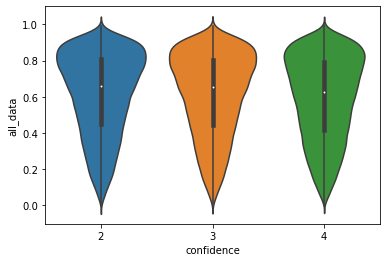

In [275]:
import seaborn as sns


sns.violinplot(x=results['confidence'].astype('category'), y = results['all_data'].astype('float'))




In [277]:
results['all_data'].astype('float')

time
2021-05-12 01:45:31.402147024    0.411002
2021-05-12 01:45:31.409191552    0.861580
2021-05-12 01:45:31.416235872    0.730249
2021-05-12 01:45:31.472990368         NaN
2021-05-12 01:45:31.487096896    0.717089
                                   ...   
2021-10-11 18:29:19.004891792    0.487941
2021-10-11 18:29:19.011964480    0.591623
2021-10-11 18:29:19.019013536    0.532761
2021-10-11 18:29:19.026024048    0.446364
2021-10-11 18:29:19.068190512         NaN
Name: all_data, Length: 200402, dtype: float64

In [278]:
results = results[results['all_data'].notna()]
results

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,...,grmesa_27416_21016-002_21017-017_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21017-017_21019-017_0006d_s01_L090VV_01.cor.grd,grmesa_27416_20013-004_20017-006_0015d_s01_L090VV_01.cor.grd,grmesa_27416_20008-004_20013-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20003-028_20005-007_0011d_s01_L090VV_01.cor.grd,grmesa_27416_21007-004_21010-002_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20005-007_20008-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21010-002_21011-010_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21011-010_21016-002_0021d_s01_L090VV_01.cor.grd,all_data
time,,,,,,,,,,,,,,,,,,,,,
2021-05-12 01:45:31.402147024,11,0.0,0.177678,11,2,737,216252,0,4.640017,-0.148370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.411002
2021-05-12 01:45:31.409191552,14,0.0,0.118038,11,2,737,216254,0,4.279653,-0.137875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.86158
2021-05-12 01:45:31.416235872,11,0.0,0.179987,11,2,737,216257,0,3.948468,-0.054192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730249
2021-05-12 01:45:31.487096896,10,0.0,0.486438,11,4,737,216276,0,15.091055,0.164725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.717089
2021-05-12 01:45:31.494150240,18,0.0,0.206413,11,4,737,216279,0,7.265969,0.127339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-11 18:29:18.758318848,35,0.0,0.146520,13,3,295,217125,0,3.000000,-0.085219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.783656,0.783656
2021-10-11 18:29:19.004891792,46,0.0,0.057069,13,3,295,217212,0,3.000000,-0.114972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.487941,0.487941
2021-10-11 18:29:19.011964480,48,0.0,0.107065,13,3,295,217215,0,6.030207,-0.073004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.591623,0.591623


<AxesSubplot:xlabel='confidence', ylabel='all_data'>

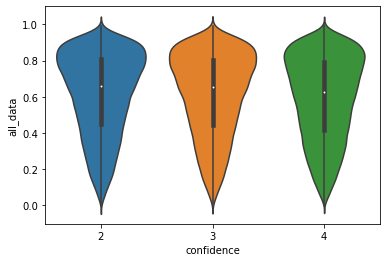

In [279]:
sns.violinplot(x=results['confidence'].astype('category'), y = results['all_data'].astype('float'))


(array([  394.,  1102.,  1778.,  2419.,  3112.,  3649.,  4134.,  4661.,
         4968.,  5451.,  5796.,  5939.,  6379.,  6645.,  7048.,  7307.,
         7744.,  8071.,  8711.,  9415.,  9779., 10291., 10985., 11497.,
        11910., 11768., 11006.,  8822.,  4829.,   758.]),
 array([0.00213952, 0.03527854, 0.06841757, 0.1015566 , 0.13469563,
        0.16783465, 0.20097368, 0.23411271, 0.26725174, 0.30039077,
        0.33352979, 0.36666882, 0.39980785, 0.43294688, 0.46608591,
        0.49922493, 0.53236396, 0.56550299, 0.59864202, 0.63178105,
        0.66492007, 0.6980591 , 0.73119813, 0.76433716, 0.79747619,
        0.83061521, 0.86375424, 0.89689327, 0.9300323 , 0.96317133,
        0.99631035]),
 <BarContainer object of 30 artists>)

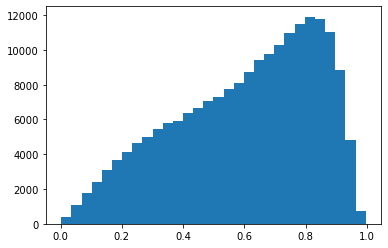

In [289]:
plt.hist(results['all_data'].astype('float').values, bins = 30)

In [284]:
results['all_data'].astype('float')[40:]

time
2021-05-12 01:45:32.458886064    0.597862
2021-05-12 01:45:32.465378976    0.501979
2021-05-12 01:45:32.542168176    0.160091
2021-05-12 01:45:32.549273280    0.773649
2021-05-12 01:45:32.594124944    0.803015
                                   ...   
2021-10-11 18:29:18.758318848    0.783656
2021-10-11 18:29:19.004891792    0.487941
2021-10-11 18:29:19.011964480    0.591623
2021-10-11 18:29:19.019013536    0.532761
2021-10-11 18:29:19.026024048    0.446364
Name: all_data, Length: 196328, dtype: float64

In [ ]:
#CLEAN CODE

In [1]:
import pickle
out_fp = "../../data/grmesa_confidence.pkl"
grmesa_confidence = pickle.load(open(out_fp, 'rb'))

In [2]:
grmesa_confidence

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence
time,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07 23:39:21.150983040,59,0.0,0.032379,14,6,1156,785594,0,3.000000,0.000827,1.573492e+07,3081.949503,0.153147,1.319316e+08,60,POINT (-108.11808 38.97362),4
2022-03-07 23:39:21.158036960,52,0.0,0.040683,14,6,1156,785596,0,3.000000,-0.000879,1.573497e+07,3081.936818,0.162212,1.319316e+08,60,POINT (-108.11813 38.97317),4
2022-03-07 23:39:21.158716592,32,0.0,0.056379,14,4,1156,785591,0,3.000000,0.007142,1.573486e+07,3032.805862,0.136475,1.319316e+08,40,POINT (-108.08141 38.97142),4


In [3]:
import numpy as np
import os


# This function written by David Shean, UW
#src = rio.open(fn)
def sample_raster(df, src, diff_col=None):
    #df_proj = df.to_crs(src.crs)
    coord = [(pt.x, pt.y) for pt in df.to_crs(src.crs).geometry]
    s = np.fromiter(src.sample(coord), dtype=src.dtypes[0])
    #s[s == src.nodata] = np.nan
    sm = np.ma.masked_equal(s, src.nodata)
    sample_colname = os.path.splitext(os.path.split(src.name)[-1])[0]
    df[sample_colname] = sm
    if diff_col is not None:
        out_colname = '{} {} diff'.format(diff_col, sample_colname)
        df[out_colname] = df[diff_col] - df[sample_colname]
    else:
        out_colname = sample_colname
    return out_colname


NameError: name 'src' is not defined

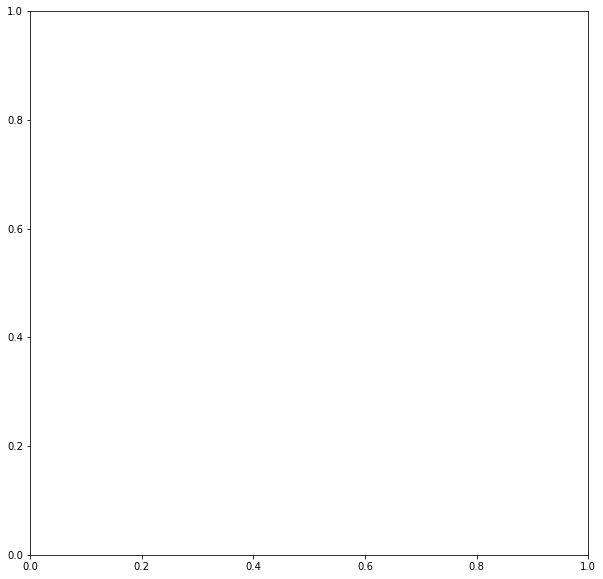

In [4]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))

# Plot Near IR, Red, Green and Blue (rgb)
show((src), ax=ax)
grmesa_confidence.plot(ax=ax, color='yellow')

In [5]:
grmesa_confidence['datetime'] = grmesa_confidence.index.to_pydatetime()
grmesa_confidence.head()

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,distance,h_mean,rms_misfit,delta_time,gt,geometry,confidence,datetime
time,,,,,,,,,,,,,,,,,,
2018-10-17 22:31:18.451049752,12,0.0,0.091676,1,2,295,216256,0,3.111202,0.025380,4.336883e+06,1774.852969,0.312240,2.505068e+07,50,POINT (-108.29836 38.98137),2,2018-10-17 22:31:18.451049
2018-10-17 22:31:18.458099976,18,0.0,0.048823,1,2,295,216258,0,3.000000,0.021470,4.336933e+06,1776.170553,0.205758,2.505068e+07,50,POINT (-108.29841 38.98182),2,2018-10-17 22:31:18.458099
2018-10-17 22:31:18.465141600,17,0.0,0.032050,1,2,295,216261,0,3.000000,0.027447,4.336983e+06,1777.465900,0.123890,2.505068e+07,50,POINT (-108.29847 38.98227),2,2018-10-17 22:31:18.465141
2018-10-17 22:31:18.472171260,10,0.0,0.106630,1,2,295,216263,0,3.000000,0.025624,4.337033e+06,1778.813468,0.336372,2.505068e+07,50,POINT (-108.29852 38.98272),2,2018-10-17 22:31:18.472171
2018-10-17 22:31:18.479208480,18,0.0,0.104997,1,2,295,216265,0,3.000000,0.049735,4.337083e+06,1780.784068,0.368985,2.505068e+07,50,POINT (-108.29858 38.98317),2,2018-10-17 22:31:18.479208


In [6]:
from os.path import expanduser, join
from glob import glob
import pandas as pd


shared_dir = expanduser('~/shared/isce_sat2/')
dirs = glob(join(shared_dir, '*'))
dirs = [d for d in dirs if 'tmp' not in d]
res = {}
for d in dirs:
    csv = pd.read_csv(glob(join(d, '*.csv'))[0], index_col = 0)
    
    start = pd.to_datetime(csv.loc['value','start time of acquisition for pass 1'])
    end = pd.to_datetime(csv.loc['value','stop time of acquisition for pass 2'])
    
    #start = pd.to_datetime(csv['start time of acquisition for pass 1'][0])
    #end  = pd.to_datetime(csv['stop time of acquisition for pass 2'][0])
    res[d] = {'start':start,'end':end}

In [7]:
res

{'/home/jovyan/shared/isce_sat2/grmesa_27416_21019-017_21021-005_0006d_s01_L090_01_int_grd': {'start': Timestamp('2021-03-16 16:39:43+0000', tz='UTC'),
  'end': Timestamp('2021-03-22 15:33:21+0000', tz='UTC')},
 '/home/jovyan/shared/isce_sat2/grmesa_27416_21016-002_21017-017_0007d_s01_L090_01_int_grd': {'start': Timestamp('2021-03-03 22:03:00+0000', tz='UTC'),
  'end': Timestamp('2021-03-10 16:39:45+0000', tz='UTC')},
 '/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20008-004_0018d_s01_L090_01_int_grd': {'start': Timestamp('2020-02-01 02:13:16+0000', tz='UTC'),
  'end': Timestamp('2020-02-19 17:27:07+0000', tz='UTC')},
 '/home/jovyan/shared/isce_sat2/grmesa_27416_21017-017_21019-017_0006d_s01_L090_01_int_grd': {'start': Timestamp('2021-03-10 16:36:24+0000', tz='UTC'),
  'end': Timestamp('2021-03-16 16:42:21+0000', tz='UTC')},
 '/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20013-004_0025d_s01_L090_01_int_grd': {'start': Timestamp('2020-02-01 02:13:16+0000', tz='UTC'),
  'e

In [8]:

from glob import glob
from os.path import join, expanduser
results = pd.DataFrame()
for key, val in res.items():
    start = val['start']
    end = val['end']
    
    sub = grmesa_confidence[(grmesa_confidence['datetime'].dt.tz_localize('UTC')>start) & (grmesa_confidence['datetime'].dt.tz_localize('UTC')<end)]                                                                   
    try:
        cor_fp = glob(join(key, '*VV*.cor*'))[0]
        tmp = rio.open(cor_fp)
        sample_raster(sub, tmp)
        results = results.append(sub)
        
    except:
        print(key)
    

/home/jovyan/shared/isce_sat2/grmesa_27416_21019-017_21021-005_0006d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_21016-002_21017-017_0007d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20008-004_0018d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_21017-017_21019-017_0006d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20013-004_0025d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_20013-004_20017-006_0015d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_20008-004_20013-004_0007d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_20003-028_20005-007_0011d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_21007-004_21010-002_0007d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_20005-007_20008-004_0007d_s01_L090_01_int_grd
/home/jovyan/shared/isce_sat2/grmesa_27416_21010-002_21011-010_0007d_s01_L090_01_int_grd
/home/jovyan/shared/i

In [30]:
end

Timestamp('2021-03-03 22:06:37+0000', tz='UTC')

In [10]:
results['all_data'] = results.bfill(axis=1).iloc[:,-10]



IndexError: single positional indexer is out-of-bounds

<AxesSubplot:xlabel='confidence', ylabel='all_data'>

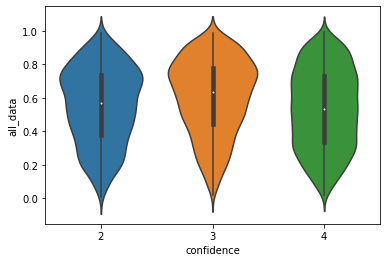

In [32]:
import seaborn as sns

sns.violinplot(x=results['confidence'].astype('category'), y = results['all_data'].astype('float'))

<AxesSubplot:>

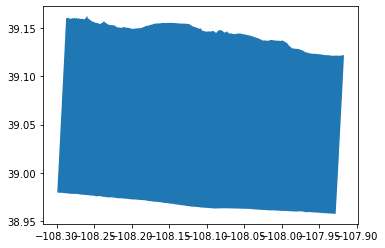

In [5]:
import geopandas as gpd

fp = '/home/jovyan/isce_sat2/data/uavsar_shape_files/grmesa_27416_21019-017_21021-005_0006d_s01_L090HH_01.cor.grd .shp'

bound = gpd.read_file(fp)
bound.plot()


In [6]:
bound

,FID,geometry
0,0,"POLYGON ((-108.25922 39.16208, -108.25899 39.1..."


In [47]:
import py3dep
from pynhd import NLDI

#geom = NLDI().get_basins("01031500").geometry[0]
dem = py3dep.get_map("DEM", bound.geometry[0], resolution=30, geo_crs="epsg:4326", crs="epsg:4326")
slope = py3dep.get_map("Slope Degrees", bound.geometry[0], resolution=30)
slope = py3dep.deg2mpm(slope)

In [48]:
dem

<xarray.DataArray 'elevation' (y: 757, x: 1103)>
dask.array<copy, shape=(757, 1103), dtype=float32, chunksize=(757, 1103), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 39.16 39.16 39.16 39.16 ... 38.96 38.96 38.96 38.96
  * x            (x) float64 -108.3 -108.3 -108.3 ... -107.9 -107.9 -107.9
    spatial_ref  int64 0
Attributes:
    SourceBandIndex:  0
    _FillValue:       nan
    nodatavals:       (nan,)

In [49]:
dem.rio.to_raster('dem.tif')
dem_rast = rio.open('dem.tif')

In [50]:
slope.rio.to_raster('slope.tif')
slope_rast = rio.open('slope.tif')

In [52]:
dem_rast.crs

CRS.from_epsg(4326)

In [152]:
results_test = results.copy()

In [1]:
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

results_test = results.copy()

f, ax = plt.subplots()
slope.plot(ax = ax)
results_test['confidence'] = results_test['confidence'].astype('category')
results_test = results_test.iloc[::10]
val = 0.01

results_test.geometry = results_test.geometry.apply(lambda p: Point(p.x + np.random.uniform(low=np.negative(val), high=val),p.y + np.random.uniform(low=np.negative(val), high=val)))

results_test.plot(ax = ax, column = 'confidence', legend =True)


NameError: name 'results' is not defined

In [57]:
sample_raster(results, dem_rast)
sample_raster(results, slope_rast)
results

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,...,grmesa_27416_20013-004_20017-006_0015d_s01_L090VV_01.cor.grd,grmesa_27416_20008-004_20013-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20003-028_20005-007_0011d_s01_L090VV_01.cor.grd,grmesa_27416_21007-004_21010-002_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20005-007_20008-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21010-002_21011-010_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21011-010_21016-002_0021d_s01_L090VV_01.cor.grd,all_data,dem,slope
time,,,,,,,,,,,,,,,,,,,,,
2021-03-09 16:59:44.851112512,26,0.0,0.099561,10,2,1156,784609,0,4.813603,0.187239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.858155616,20,0.0,0.118155,10,2,1156,784612,0,4.816803,0.187366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.858494848,24,0.0,0.040237,10,4,1156,784606,0,3.000000,0.046540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.865198768,28,0.0,0.209427,10,2,1156,784614,0,5.252246,0.204569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.865526944,30,0.0,0.029173,10,4,1156,784608,0,3.000000,0.047860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.854997,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-12 23:26:23.597221656,429,0.0,0.043028,6,5,737,217198,0,5.774002,-0.225158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-12 23:26:23.604231560,557,0.0,0.049764,6,5,737,217201,0,8.411136,-0.169655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-12 23:26:23.611233104,451,0.0,0.026689,6,5,737,217203,0,3.656780,-0.141383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

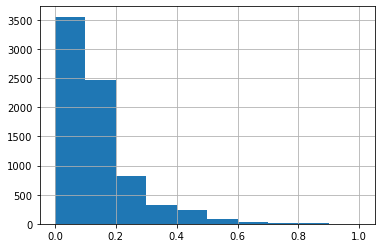

In [61]:
results['slope'].hist()

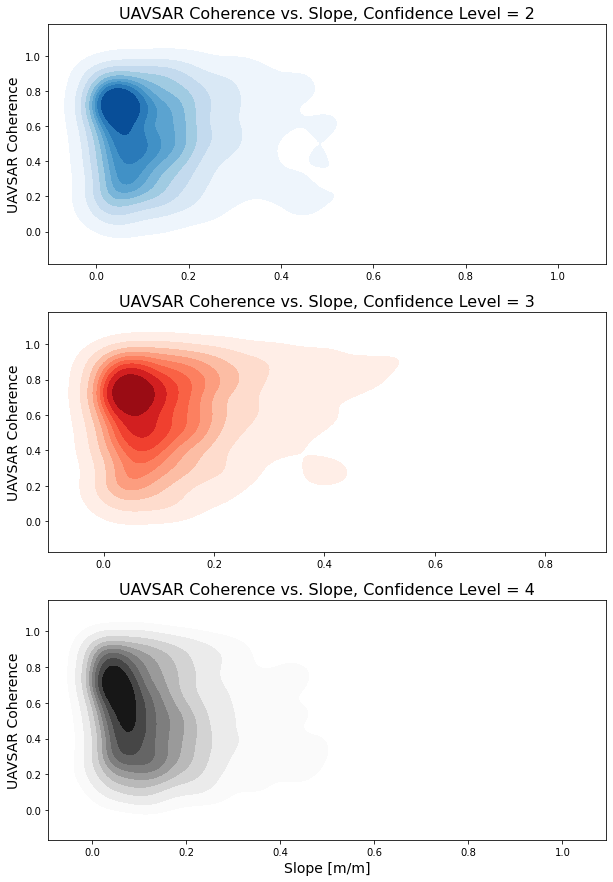

In [128]:
import seaborn as sns
from matplotlib import rcParams

colors = ["Blues", "Reds", "Greys"]

rcParams['figure.figsize'] = 10,15



f, ax = plt.subplots(3,1)
for c in range(2,5):
    sub = results[results.confidence == c]
    p = sns.kdeplot(data = sub, x='slope', y='all_data', levels = 10, cmap=colors[c-2], shade=True, ax = ax[c-2])
    if c == 4:
        p.set_xlabel("Slope [m/m]", fontsize = 14)
    else:
        p.set(xlabel=None)
        
    p.set_ylabel("UAVSAR Coherence", fontsize = 14)
    p.set_title(f"UAVSAR Coherence vs. Slope, Confidence Level = {c}", fontsize = 16)

    
    

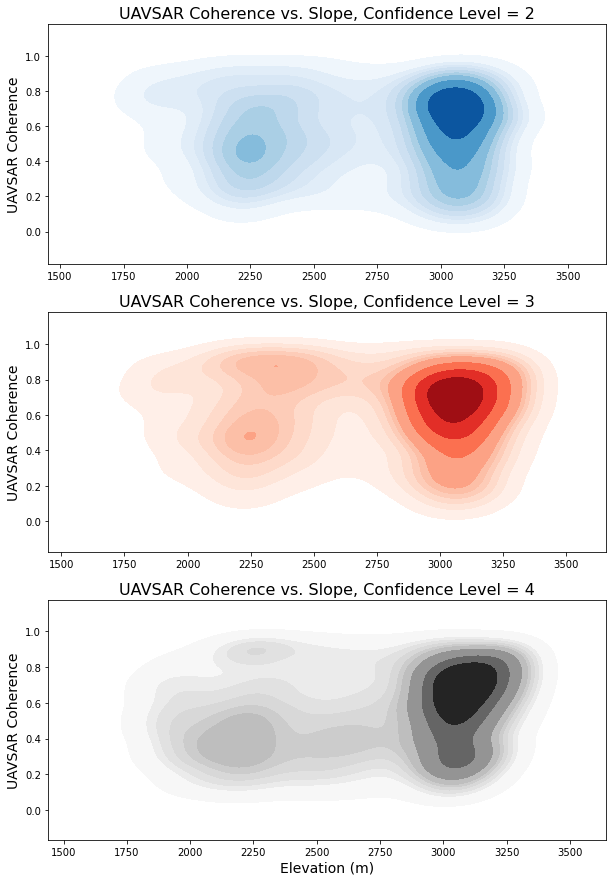

In [129]:

colors = ["Blues", "Reds", "Greys"]

rcParams['figure.figsize'] = 10,15



f, ax = plt.subplots(3,1)
for c in range(2,5):
    sub = results[results.confidence == c]
    p = sns.kdeplot(data = sub, x='dem', y='all_data', levels = 10, cmap=colors[c-2], shade=True, ax = ax[c-2])
    #p = sns.scatterplot(data = sub, x='dem', y='all_data', ax = ax[c-2])
    if c == 4:
        p.set_xlabel("Elevation (m)", fontsize = 14)
    else:
        p.set(xlabel=None)
        
    p.set_ylabel("UAVSAR Coherence", fontsize = 14)
    p.set_title(f"UAVSAR Coherence vs. Slope, Confidence Level = {c}", fontsize = 16)

    

In [121]:
aspect = py3dep.get_map("Aspect Degrees", bound.geometry[0], resolution=30)
#aspect = py3dep.deg2mpm(aspect)



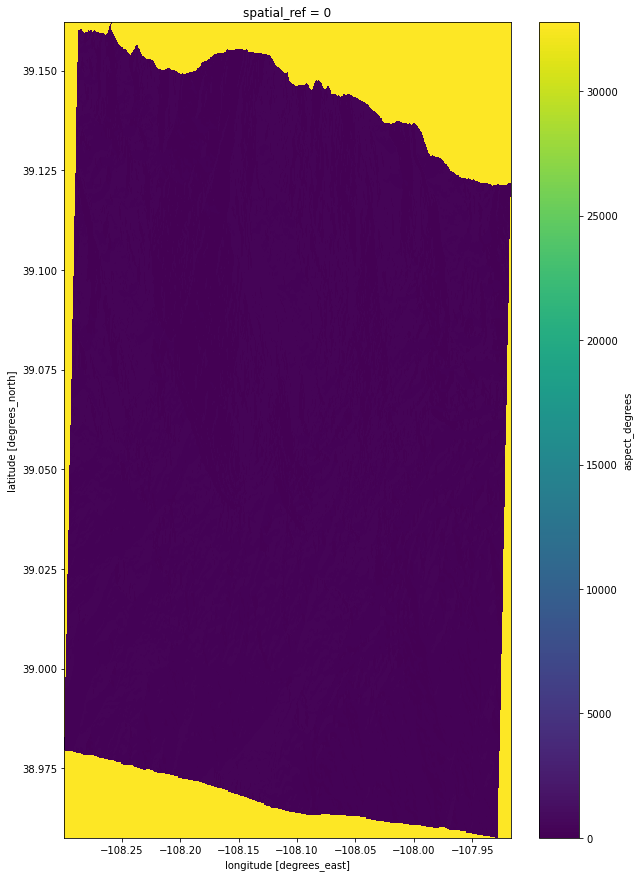

In [122]:
aspect.plot()

In [123]:
aspect.rio.to_raster('aspect.tif')
aspect_rast = rio.open('aspect.tif')
sample_raster(results, aspect_rast)

'aspect'

In [117]:
results.head()

,n_fit_photons,dh_fit_dy,h_sigma,cycle,spot,rgt,segment_id,pflags,w_surface_window_final,dh_fit_dx,...,grmesa_27416_20008-004_20013-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20003-028_20005-007_0011d_s01_L090VV_01.cor.grd,grmesa_27416_21007-004_21010-002_0007d_s01_L090VV_01.cor.grd,grmesa_27416_20005-007_20008-004_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21010-002_21011-010_0007d_s01_L090VV_01.cor.grd,grmesa_27416_21011-010_21016-002_0021d_s01_L090VV_01.cor.grd,all_data,dem,slope,aspect
time,,,,,,,,,,,,,,,,,,,,,
2021-03-09 16:59:44.851112512,26,0.0,0.099561,10,2,1156,784609,0,4.813603,0.187239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.858155616,20,0.0,0.118155,10,2,1156,784612,0,4.816803,0.187366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.858494848,24,0.0,0.040237,10,4,1156,784606,0,3.000000,0.046540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.865198768,28,0.0,0.209427,10,2,1156,784614,0,5.252246,0.204569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 16:59:44.865526944,30,0.0,0.029173,10,4,1156,784608,0,3.000000,0.047860,...,NaN,NaN,NaN,NaN,NaN,NaN,0.854997,NaN,NaN,NaN


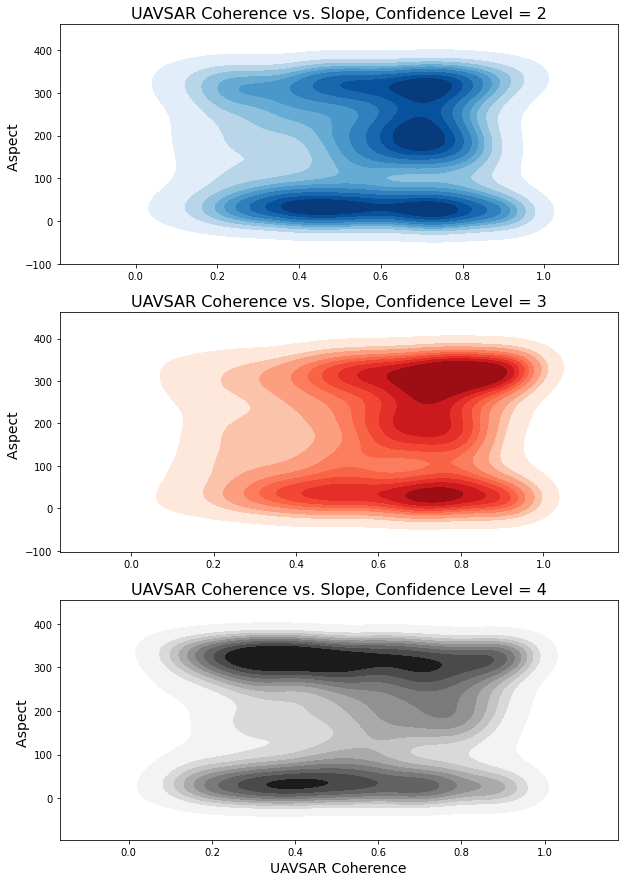

In [124]:
colors = ["Blues", "Reds", "Greys"]

rcParams['figure.figsize'] = 10,15



f, ax = plt.subplots(3,1)
for c in range(2,5):
    sub = results[results.confidence == c]
    sub = sub[sub.aspect <360]
    p = sns.kdeplot(data = sub, x='all_data', y='aspect', levels = 10, cmap=colors[c-2], shade=True, ax = ax[c-2])
    if c == 4:
        p.set_xlabel("UAVSAR Coherence", fontsize = 14)
    else:
        p.set(xlabel=None)
        
    p.set_ylabel("Aspect ", fontsize = 14)
    p.set_title(f"UAVSAR Coherence vs. Slope, Confidence Level = {c}", fontsize = 16)

    

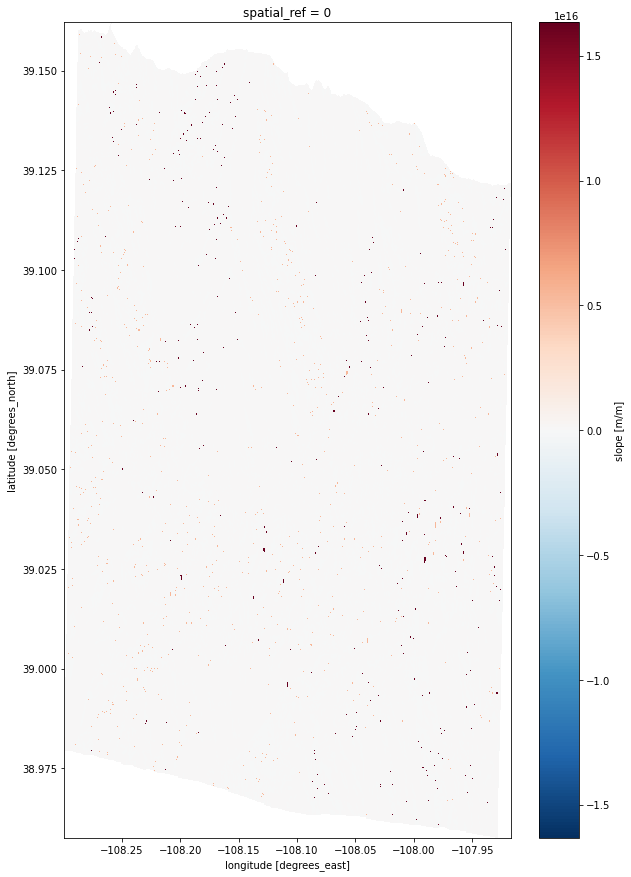

In [120]:
aspect.plot()